In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("house_prices.csv")
df = data.copy()

In [3]:
df

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,246.17268,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,246.33190,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,209.28091,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452.66701,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467.08331,Sold
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.58,322.61074,Not Sold
263,5047,5,NaN,NaN,Apartment,47,794.52,279.19126,Not Sold
264,5048,5,NaN,NaN,Apartment,48,1013.27,287.99653,Not Sold
265,5050,5,NaN,NaN,Apartment,50,1074.71,365.86878,Not Sold


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                267 non-null    int64  
 1   Building Type     267 non-null    int64  
 2   Year of sale      195 non-null    float64
 3   Month of sale     195 non-null    float64
 4   Type of property  267 non-null    object 
 5   Property #        267 non-null    int64  
 6   Area (ft.)        267 non-null    float64
 7   Price             267 non-null    float64
 8   Status            267 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

ID                   0
Building Type        0
Year of sale        72
Month of sale       72
Type of property     0
Property #           0
Area (ft.)           0
Price                0
Status               0
dtype: int64

In [9]:
df.describe()

,ID,Building Type,Year of sale,Month of sale,Property #,Area (ft.),Price
count,267.000000,267.000000,195.000000,195.000000,267.000000,267.000000,267.000000
mean,2975.142322,2.947566,2006.333333,7.271795,27.580524,936.221311,281.171901
std,1392.197474,1.391794,1.072941,3.378674,15.361437,284.894858,89.119121
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,117.564070
25%,2015.500000,2.000000,2006.000000,4.000000,14.500000,756.210000,217.553055
50%,3024.000000,3.000000,2007.000000,8.000000,28.000000,798.280000,249.075660
75%,4031.500000,4.000000,2007.000000,10.000000,40.000000,1121.950000,326.964855
max,5052.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,538.271740


In [11]:
df["Month of sale"].value_counts()

Month of sale
11.0    27
3.0     24
12.0    20
10.0    19
8.0     18
7.0     17
6.0     15
9.0     15
4.0     13
5.0     11
1.0      8
2.0      8
Name: count, dtype: int64

In [12]:
df["Year of sale"].value_counts()

Year of sale
2007.0    102
2006.0     40
2005.0     27
2004.0     16
2008.0      9
2010.0      1
Name: count, dtype: int64

In [14]:
df.isna().sum()/df.shape[0]

ID                  0.000000
Building Type       0.000000
Year of sale        0.269663
Month of sale       0.269663
Type of property    0.000000
Property #          0.000000
Area (ft.)          0.000000
Price               0.000000
Status              0.000000
dtype: float64

As we can see that only 26% of values from the total dataset are missing we can impute with mean or mode depending upon the column.

In [15]:
df.dtypes

ID                    int64
Building Type         int64
Year of sale        float64
Month of sale       float64
Type of property     object
Property #            int64
Area (ft.)          float64
Price               float64
Status               object
dtype: object

In [17]:
df["Year of sale"].fillna(value= df["Year of sale"].mode()[0],inplace=True)

In [20]:
df["Month of sale"].fillna(value = df["Month of sale"].mode()[0], inplace=True)

In [21]:
df.isna().sum()

ID                  0
Building Type       0
Year of sale        0
Month of sale       0
Type of property    0
Property #          0
Area (ft.)          0
Price               0
Status              0
dtype: int64

### Visualize

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
con_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

In [23]:
con_cols

['ID',
 'Building Type',
 'Year of sale',
 'Month of sale',
 'Property #',
 'Area (ft.)',
 'Price']

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


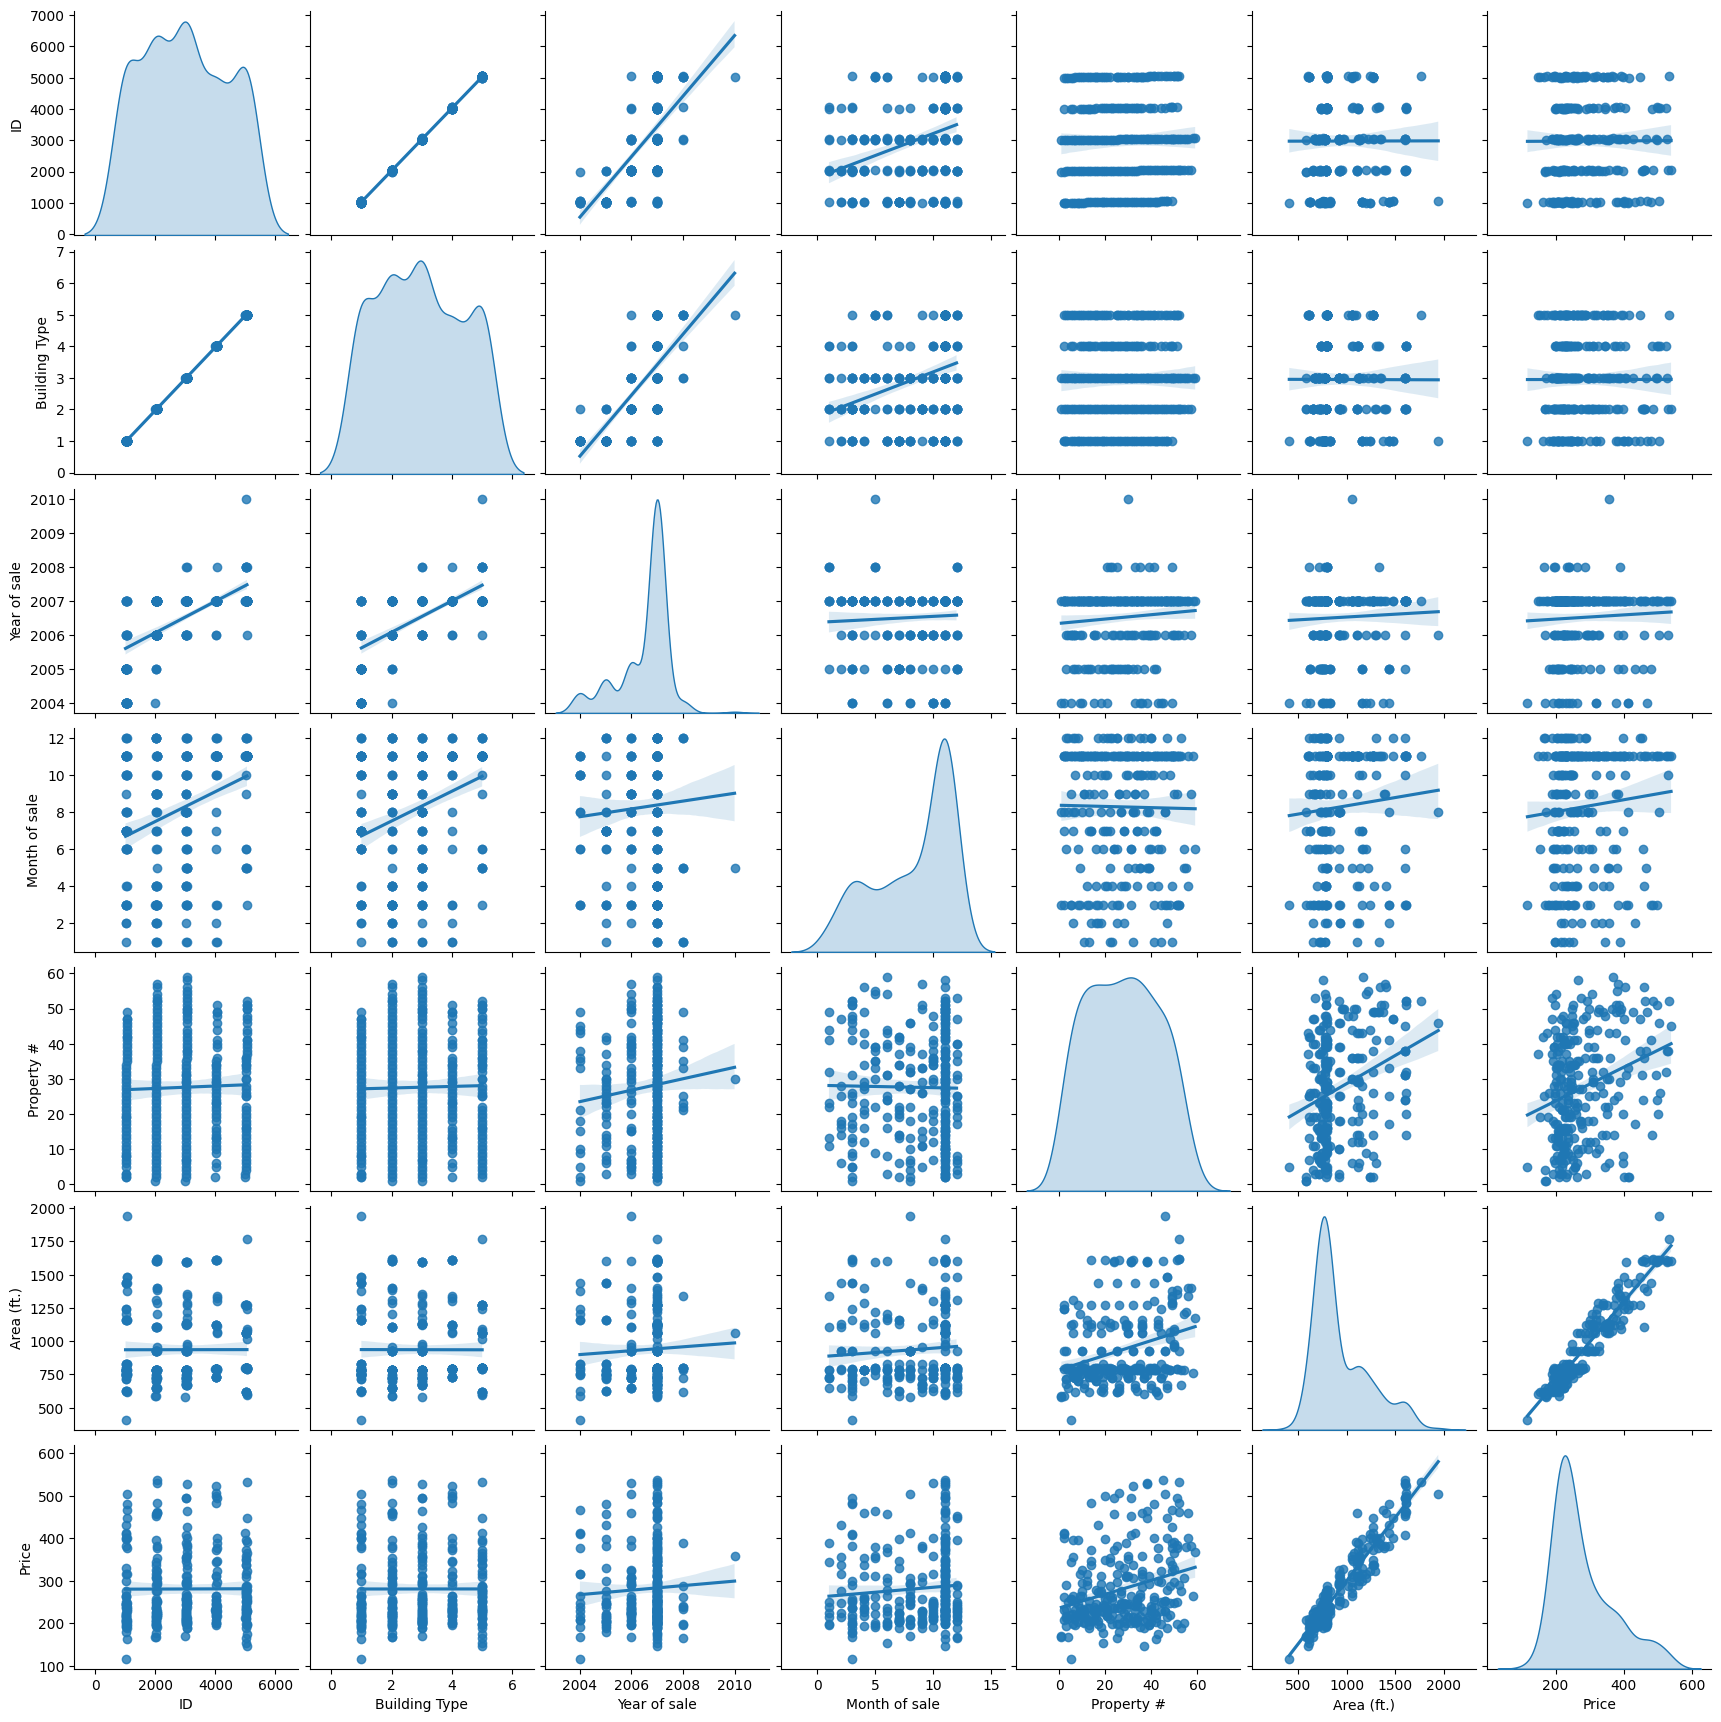

In [24]:
sns.pairplot(df[con_cols], kind= "reg", diag_kind= 'kde')
plt.show()

In [43]:
df.shape[0]

267

In [55]:
for col in df[con_cols].columns:
    if col != "Area (ft.)" and col != "Property #":
        df[col] = df[col].astype("object")
        # print(col)

In [56]:
con_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

In [57]:
cat_cols

['ID',
 'Building Type',
 'Year of sale',
 'Month of sale',
 'Type of property',
 'Price',
 'Status']

In [28]:
for i in con_cols:
    print(df[i].value_counts())

ID
3031    2
1042    2
1003    2
4013    2
3038    2
       ..
4022    1
3059    1
5027    1
5028    1
2049    1
Name: count, Length: 240, dtype: int64
Building Type
3    63
2    57
1    52
5    52
4    43
Name: count, dtype: int64
Year of sale
2007.0    174
2006.0     40
2005.0     27
2004.0     16
2008.0      9
2010.0      1
Name: count, dtype: int64
Month of sale
11.0    99
3.0     24
12.0    20
10.0    19
8.0     18
7.0     17
6.0     15
9.0     15
4.0     13
5.0     11
1.0      8
2.0      8
Name: count, dtype: int64
Property #
34    7
29    6
30    6
49    6
36    6
25    6
2     6
16    6
13    6
19    6
41    6
35    5
46    5
23    5
26    5
47    5
51    5
7     5
20    5
27    5
33    5
15    5
6     5
18    5
44    5
11    5
31    5
21    5
8     5
38    5
9     5
39    5
5     5
32    5
50    5
10    5
40    5
3     5
12    5
14    5
28    5
22    5
43    4
37    4
24    4
42    4
17    4
52    4
48    4
4     3
56    2
54    2
53    2
1     2
45    2
59    1
55    1
57    

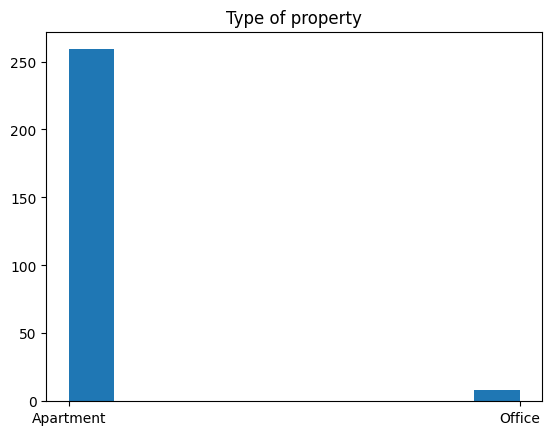

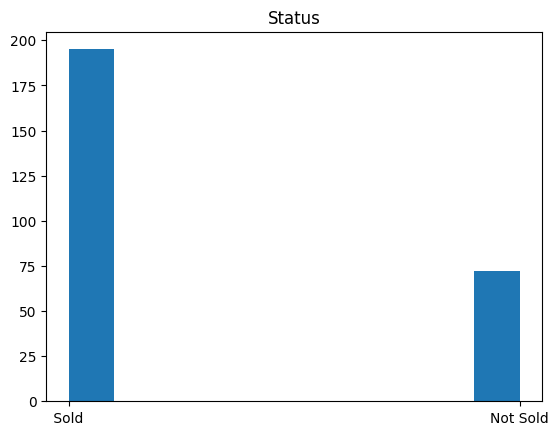

<Figure size 640x480 with 0 Axes>

In [32]:
for i in cat_cols:
    plt.hist(df[i], bins="auto")
    plt.title(i)
    plt.show()
plt.tight_layout()
plt.show()


In [33]:
con_cols.remove("Price")

In [34]:
con_cols

['ID',
 'Building Type',
 'Year of sale',
 'Month of sale',
 'Property #',
 'Area (ft.)']

Checking with log transformation

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


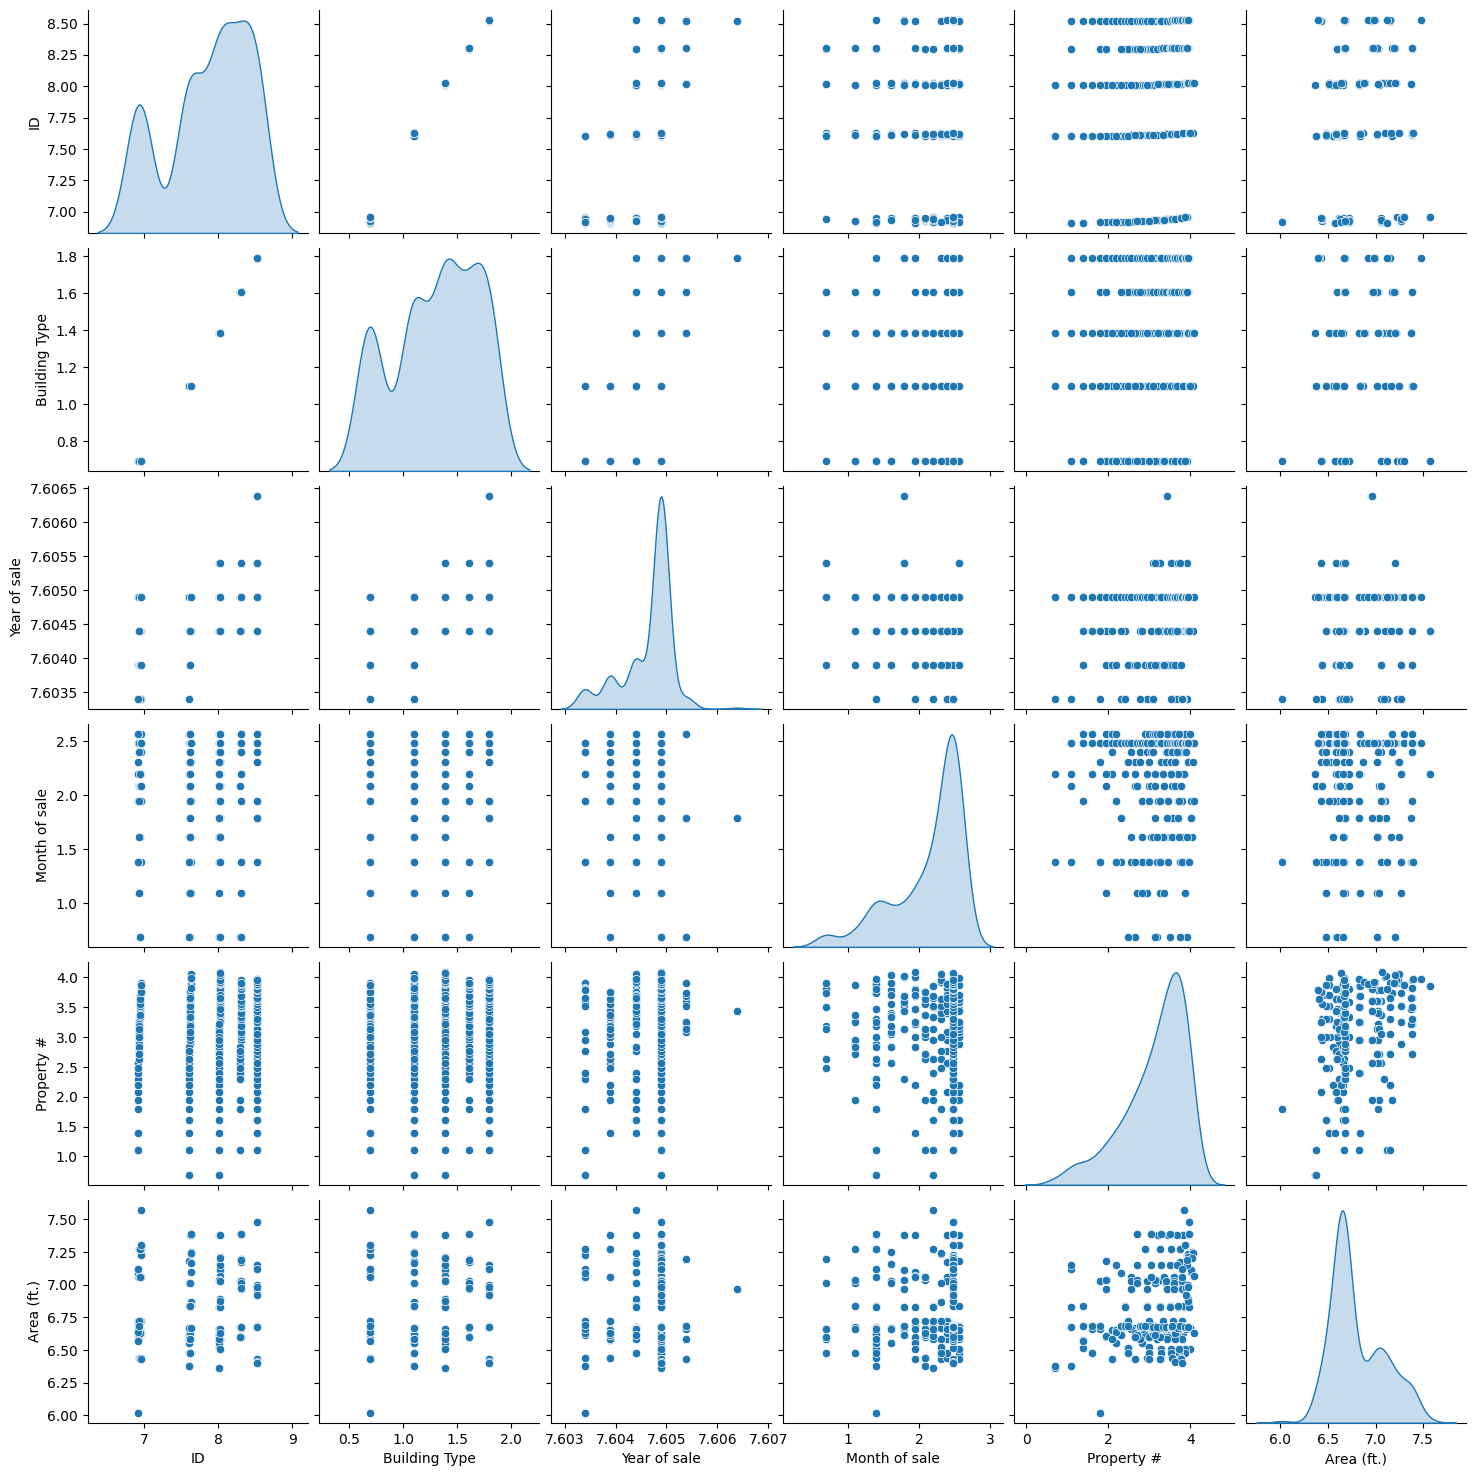

In [35]:
sns.pairplot(np.log(df[con_cols] +1 ), diag_kind= "kde")
plt.show()

Checking with cbrt and sqrt transformation

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


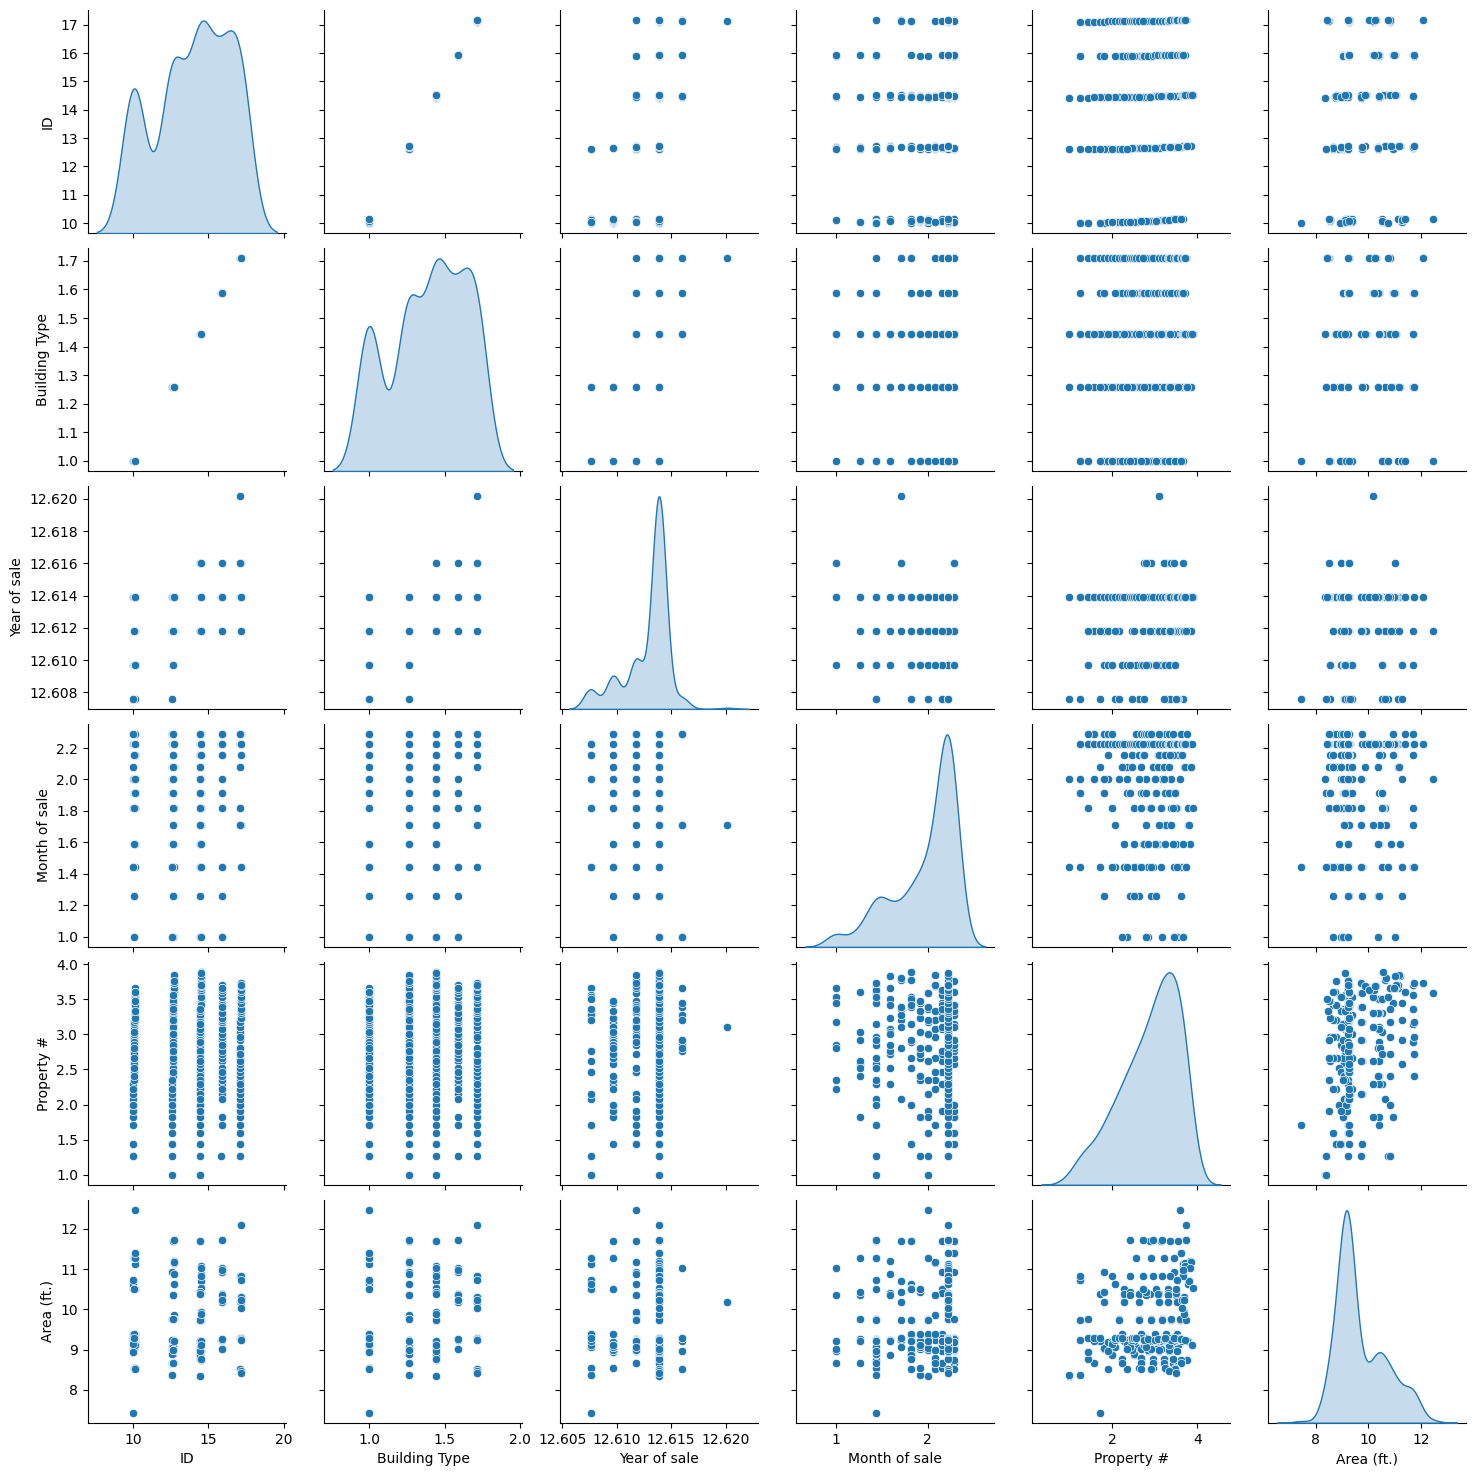

In [36]:
sns.pairplot(np.cbrt(df[con_cols]), diag_kind='kde')
plt.show()

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


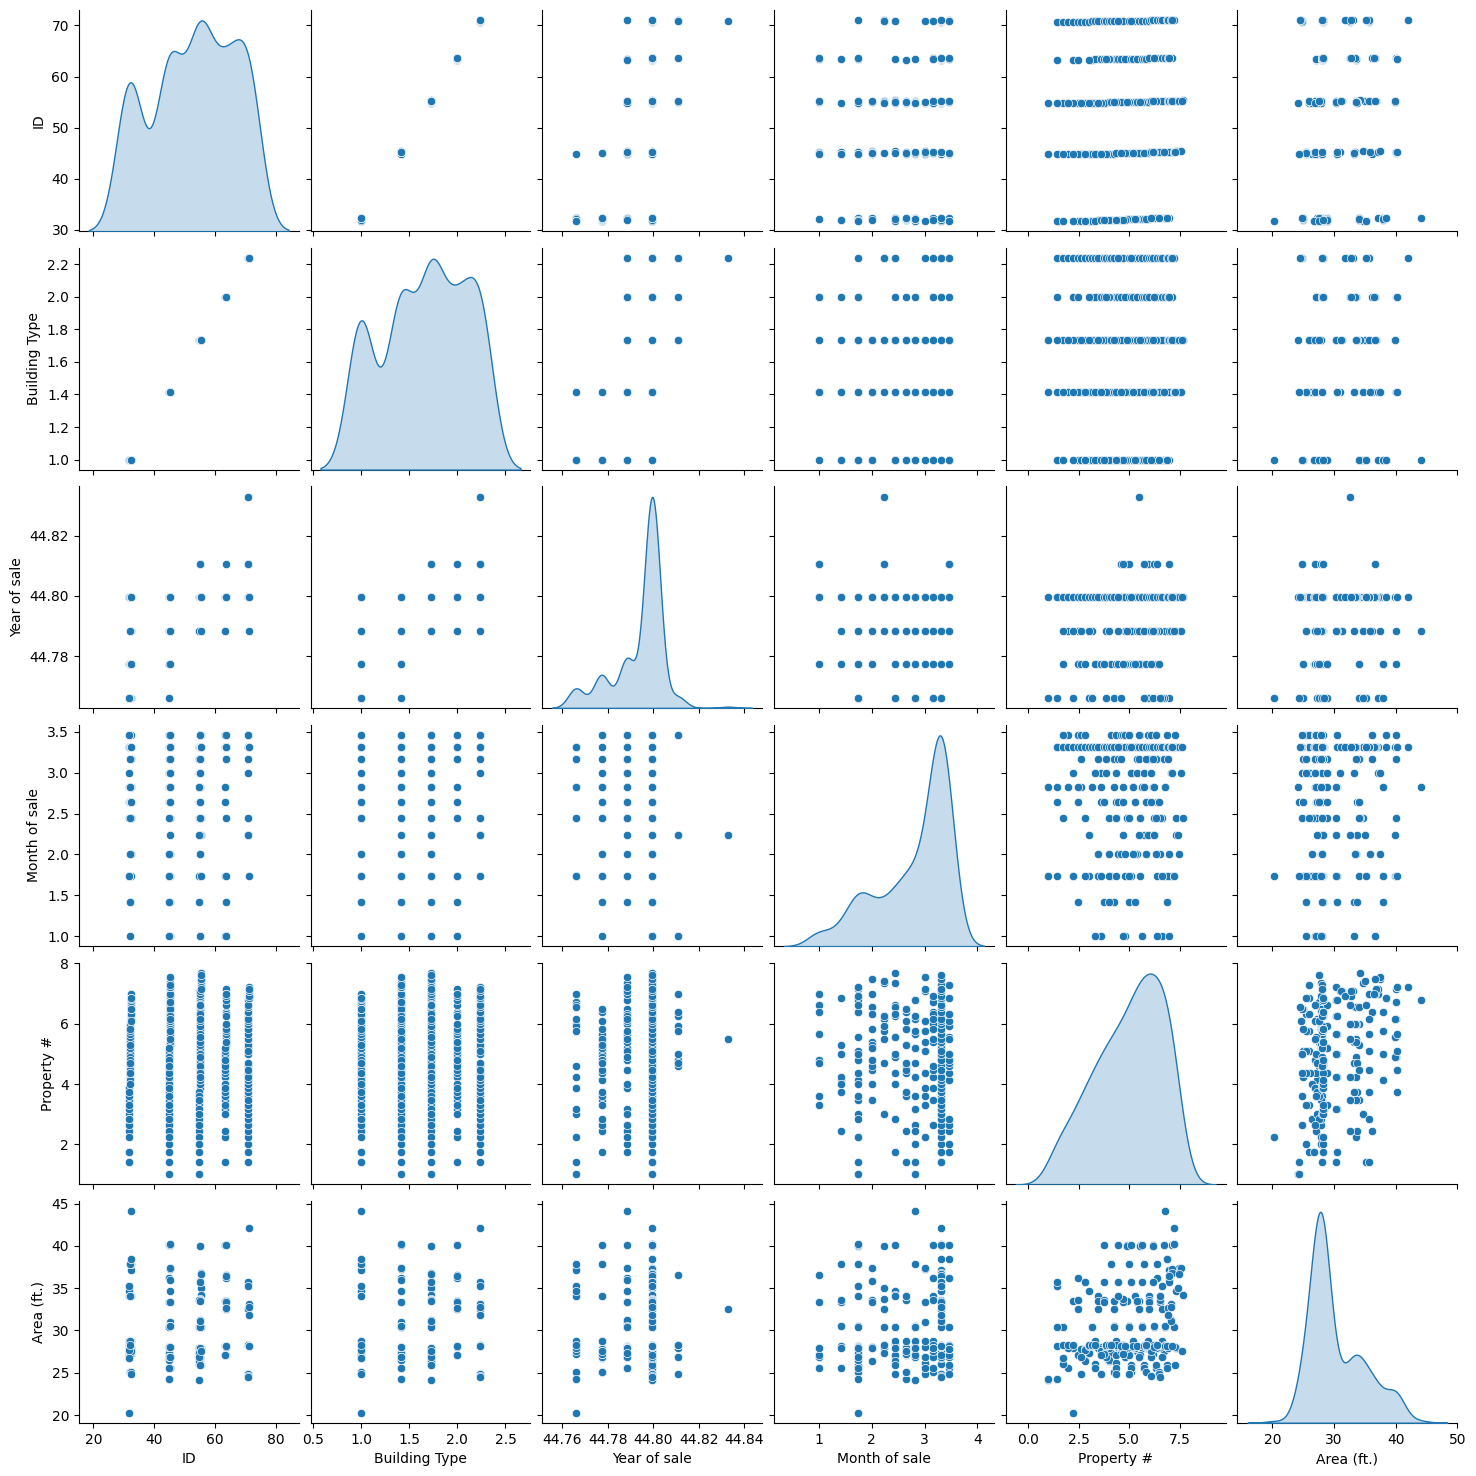

In [38]:
sns.pairplot(np.sqrt(df[con_cols]), diag_kind='kde')
plt.show()

In [ ]:
con_cols.insert(-1, df.columns[-1])

In [72]:
con_cols

['Property #', 'Price', 'Area (ft.)']

<Axes: >

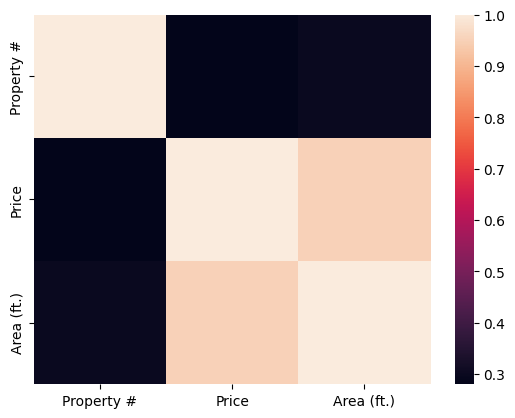

In [73]:
sns.heatmap(df[con_cols].corr())

<Figure size 1000x800 with 0 Axes>

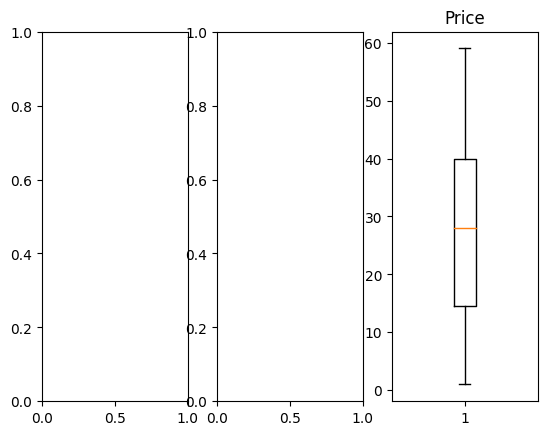

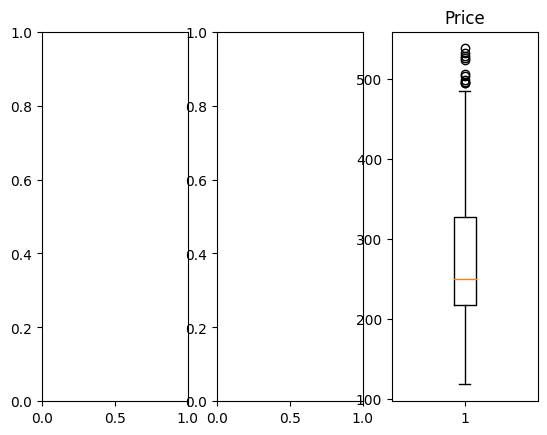

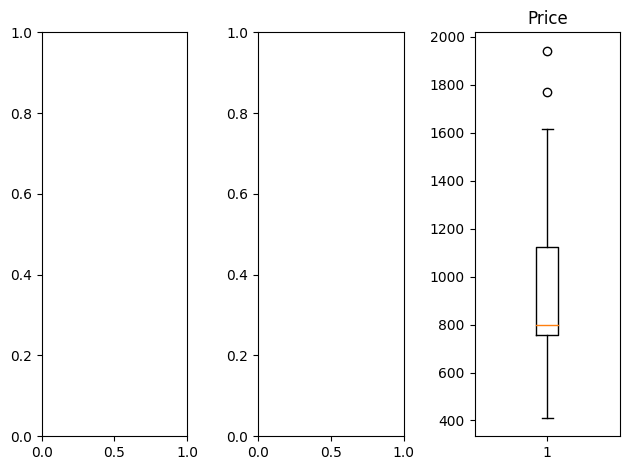

In [84]:
plt.figure(figsize=(10,8))
for i in con_cols:
    plt.subplots(nrows = 1, ncols = len(con_cols))
    plt.boxplot(df[i])
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [85]:
df.loc[:,"Building Type":"Month of sale"]

,Building Type,Year of sale,Month of sale
0,1,2005.0,11.0
1,1,2005.0,10.0
2,2,2007.0,7.0
3,2,2007.0,12.0
4,1,2004.0,11.0
...,...,...,...
262,5,2007.0,11.0
263,5,2007.0,11.0
264,5,2007.0,11.0
265,5,2007.0,11.0
